In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../Linear Regression/DATA/cement_slump.csv')
df.head(10)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
5,147.0,89.0,115.0,202.0,9.0,860.0,829.0,23.0,55.0,25.21
6,152.0,139.0,178.0,168.0,18.0,944.0,695.0,0.0,20.0,38.86
7,145.0,0.0,227.0,240.0,6.0,750.0,853.0,14.5,58.5,36.59
8,152.0,0.0,237.0,204.0,6.0,785.0,892.0,15.5,51.0,32.71
9,304.0,0.0,140.0,214.0,6.0,895.0,722.0,19.0,51.0,38.46


<Axes: >

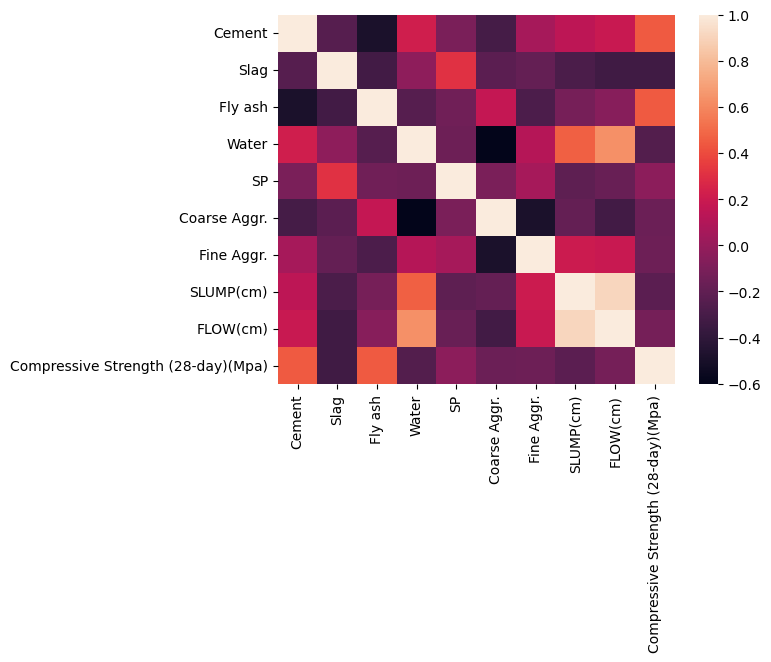

In [8]:
sns.heatmap(df.corr())

In [9]:
X = df.drop('Compressive Strength (28-day)(Mpa)' , axis=1)
y = df['Compressive Strength (28-day)(Mpa)']
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.33,  random_state=101)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
param_grid = {'C' : [0.001 , 0.01, 0.1 , 0.5 , 1] , 'kernel' :['linear','rbf','poly'] , 'gamma':['scale','auto'],'degree':[2,3,4],'epsilon':[0.001,0.1,0.5,1,2]}
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(svr , param_grid)
grid_model.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0.001, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [13]:
grid_model.best_estimator_

SVR(C=1, degree=2, epsilon=2, kernel='linear')

In [14]:
model = SVR(C=1 , degree=2 , epsilon = 2 , kernel = 'linear')
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
y_pred_grid = grid_model.predict(x_test)
from sklearn.metrics import mean_absolute_error , mean_squared_error
print(mean_absolute_error(y_pred , y_test))
print(np.sqrt(mean_squared_error(y_test , y_pred)))
print(mean_absolute_error(y_pred_grid , y_test))
print(np.sqrt(mean_squared_error(y_test , y_pred_grid)))

2.469279688054266
3.087733118439022
2.469279688054266
3.087733118439022
